
---
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ItamarRocha/AI/blob/master/airbnb/Airbnb.ipynb)

# Data analysis of Airbnb London
Airbnb is an online e-commerce marketplace founded in August 2008 that offers lodging, homestays, hostel beds, hotel rooms and vacation and apartment rentals. Its big differential is the inovation behind its operation. The company doesnt own any of the listed properties. In fact, the company acts as a broker between the consumers ( in this case the people willing to get a place to stay ) and the producers ( the owners of the properties ).

As a modern company seeking for inovation, the data of some cities can be found in the [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this notebook we are going to analyse the data of Airbnb London. We hope to get some insights and understand how the company is present and its dynamics in one of the biggest cities in the world.**

## Setup

All data used in this notebook were achieved at [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

To start, we are going to use the listings.csv.

* `listings.csv` - *Summary information and metrics for listings in London.*


In [1]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplleaflet # library used to plot our maps

%matplotlib inline

/home/itamar/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import file
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv")

## Análise dos Dados

This stage purpose is to understand how the data is organized.


**Variables dictionary**

* `id` - identification number
* `name` - name of the property
* `host_id` - host id number
* `host_name` - host name
* `neighbourhood_group` - none
* `neighbourhood` - neighbourhood name
* `latitude` - properties latitude coordinate
* `longitude` - properties longitude coordinate
* `room_type` - place type
* `price` - rental price
* `minimum_nights` - minimum nights to rent
* `number_of_reviews` - number of reviews that the property helds on Airbnb
* `last_review` - date of the last reviews
* `reviews_per_month` - monthly review quantity
* `calculated_host_listings_count` - number of properties from the same host
* `availability_365` - vacancy days during the year  
**Lets now have a look at our dataset**

In [3]:
# shows the first 5 inputs
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### checking the size of the dataset.

In [4]:
df.shape

(85207, 16)

* with the above output we can observe that we have 85207 examples and, as previously said, 16 columns ( attributes ) in each example. This dataset is one of the largest in the Airbnb as London is one of the biggest cities in the world in terms of turism and business.
* Nowadays london has approximately 9 million inhabitants.
![population.png](imgs/population.png)
<br>

## Missing Data

In this section we are going to check for missing data

In [5]:
# Printing the total amount of missin data
print(df.isnull().sum())

id                                    0
name                                 24
host_id                               0
host_name                            28
neighbourhood_group               85207
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21438
reviews_per_month                 21438
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
# Printing the relative amount of missing data
print(np.round(df.isnull().sum()/df.shape[0] * 100,2).sort_values(ascending = False))

neighbourhood_group               100.00
reviews_per_month                  25.16
last_review                        25.16
host_name                           0.03
name                                0.03
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
id                                  0.00
dtype: float64


* With this we can conclude that the neighbourhood_group attribute is not available in any of the rows. With that said we can drop it since it wont be useful.

* With respect to last_review and review_months, these attributes have nearly 25% of their data missing.

* As to the name and host_name, these attributes have less than 0.03% of missing data


In [7]:
# dropping the neighbourhood_group
df = df.drop(columns = 'neighbourhood_group')

## Duplicated data

As a normal step in any investigation, we must check for duplicated data.

In [8]:
df.duplicated().sum()

0

With that seen, we can conclude the dataset dont have any duplicated row. Although, we can keep examining this problem and get some insights.

In [9]:
df['id'].duplicated().sum()

0

As expected, there is no duplicated id. Although, we can see below that there are 31444 duplicated host_id, which suggests that there are owners with more than 1 property in airbnb.

In [10]:
df['host_id'].duplicated().sum()

31444

In [11]:
# outputting the owners with the largest number of aparissons in airbnb
host_id = df['host_id'] 
host_id.value_counts().head(20)

33889201     910
137094377    284
13557337     248
28820321     246
48165024     233
1432477      185
27572615     165
224866971    131
50291093     117
988379       104
10961046     102
81617302      89
111291126     89
176910904     88
36126550      87
83740964      87
2331446       83
58828772      82
44679311      80
228928499     80
Name: host_id, dtype: int64

Now that we saw that lost of owners have more than one advertisement in airbnb, lets check if those are really individual or duplicated announces.

In [12]:
largest_advertiser = df.loc[df["host_id"] == 33889201]
largest_advertiser

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7969,6654036,"Lovely 2BR, In the Heart of Westminster, by Veeve",33889201,Unique,Westminster,51.49301,-0.13884,Entire home/apt,215,4,9,2017-10-07,0.19,910,0
8007,6683135,"Modern Thameside 2BR, Chelsea Bridge, by Veeve",33889201,Unique,Wandsworth,51.48315,-0.14844,Entire home/apt,516,3,6,2019-12-07,0.11,910,361
10548,8206251,"Up to 20% off! Open-plan 2 bed, Islington",33889201,Unique,Islington,51.53930,-0.10345,Entire home/apt,438,2,2,2017-03-19,0.04,910,0
10886,8449051,"Bright & spacious 4 BR, near the river, by Veeve",33889201,Unique,Hammersmith and Fulham,51.47161,-0.19436,Entire home/apt,714,2,4,2017-08-29,0.09,910,361
10887,8449280,"2 BR, amazing location in Central London, by V...",33889201,Unique,Camden,51.51959,-0.11887,Entire home/apt,398,3,3,2019-09-24,0.14,910,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83231,42869652,"Chic, Bright Battersea 5BR with Terrace (Veeve)",33889201,Unique,Wandsworth,51.47051,-0.15087,Entire home/apt,659,1,0,NaN,NaN,910,32
83304,42885543,Bright Battersea 2BR with Double-Height (Veeve),33889201,Unique,Wandsworth,51.46961,-0.14781,Entire home/apt,402,3,0,NaN,NaN,910,0
83502,42920159,Colourful & Charming 4BR in Battersea (Veeve),33889201,Unique,Wandsworth,51.47065,-0.17148,Entire home/apt,453,1,0,NaN,NaN,910,361
83534,42923925,Riverside Mansions,33889201,Unique,Wandsworth,51.46614,-0.21785,Entire home/apt,388,3,0,NaN,NaN,910,361


In [13]:
largest_advertiser['name'].value_counts()

Pared-Back Elegance                                   2
Traditionally grand Queen's Park home, 4 bedrooms     1
Tasteful, stunning home with a beautiful garden       1
Tranquil and relaxing 4BR home with garden (Veeve)    1
Up to 20% off! 2 bedroom flat in Fulham               1
                                                     ..
Stylish home, lovely garden near Clapham (Veeve)      1
Chic 4BR with garden, 5mins to tube, by Veeve         1
Luxurious and grand 6 bed home in Wandsworth          1
Grand 5 bed family home in Wimbledon with garden      1
Flawless house with garden in covetable Wimbledon     1
Name: name, Length: 909, dtype: int64

As shown above, it can be concluded that indeed, there is only one repeated annoucement, as show bellow.

In [14]:
largest_advertiser.loc[largest_advertiser['name'] == 'Pared-Back Elegance']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
77924,41341066,Pared-Back Elegance,33889201,Unique,Islington,51.57081,-0.11999,Entire home/apt,749,1,0,NaN,NaN,910,361
82629,42727445,Pared-Back Elegance,33889201,Unique,Islington,51.56959,-0.12071,Entire home/apt,759,3,0,NaN,NaN,910,361


* This section was useful to keep in mind that many of the advertisements are concentrated in the hands of few people.

### Extra map analysis
* Just as a matter of curiosity, lets plot the distribution of these announces in a map, to see how concentrated they are.

In [16]:
# plotar os imóveis pela latitude-longitude
plt.plot(largest_advertiser['longitude'], largest_advertiser['latitude'], 'o', color = 'blue', alpha = 0.5)
mplleaflet.show()

![imgs/advisorlarg.png](imgs/advisorlarg.png)

* As can be seen above, the dots that represent the announces are well distributed throughout the city

## Variables distribution
Here we are going to identify the variables distribution

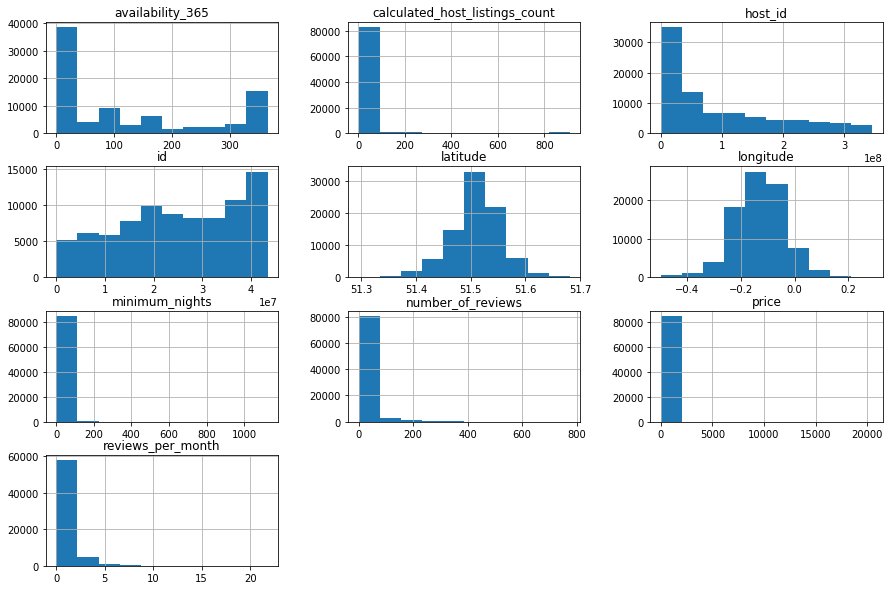

In [17]:
# plotting the variables histogram
df.hist(bins=10, figsize=(15,10));

## Outliers

With the histograms plotted, its reasonable to thinks that outliers may exist in the attributes that got a distorted graphic, like `price`, `minimum_nights` e `calculated_host_listings_count`.

There are two basic ways to check for outliers:

* An statistical resume that can be obtained by `describe()` method
* Plotting the variable boxplot.

### Describe method

In [18]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85207.000000,85207.000000,85207.000000,63769.000000,85207.000000,85207.000000
mean,128.951800,4.593437,17.284179,0.877056,20.224477,122.478975
std,306.939736,19.667718,37.170766,1.090839,98.070548,139.290122
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,46.000000,1.000000,0.000000,0.180000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.500000,1.000000,74.000000
75%,140.000000,3.000000,17.000000,1.150000,5.000000,251.000000
max,20471.000000,1125.000000,775.000000,21.810000,910.000000,365.000000


observing the results, we can conclude that:
* the `price` and `minimum_nights` are attributes that have the largest outliers.
* `number_of_reviews` and `reviews_per_month` are variables that may vary according to the client. As so, it is plausible that this variation is possible.
* `Availability_365` is inside the maximum range of 365.
* `calculated_host_listing` just confirm what we previously saw in the duplicated data section.

### Boxplot
Here we are investigating the `price` and `minimum_nights` columns

#### Minimum_nights boxplot

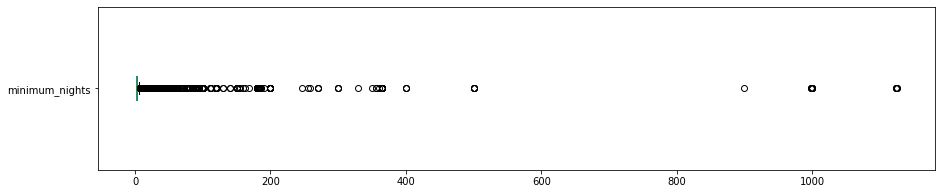

minimum_nights values above 30:
1039 Inputs
1.2194%


In [19]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights values above 30:")
print("{} Inputs".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

* We can conclude that, indeed, the boxplot shows how the data is concentrated near the 5 days area, while there are variables varying till more than 1000 days.

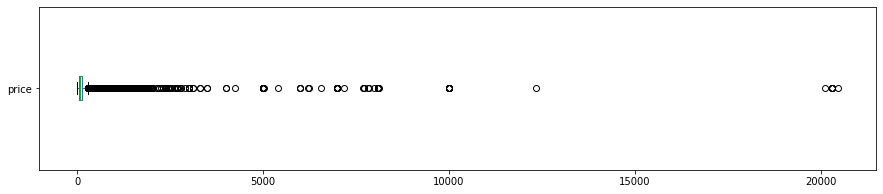


price: values above 1000
297 inputs
0.3486%


In [20]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()


print("\nprice: values above 1000")
print("{} inputs".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

### Histogram without outliers

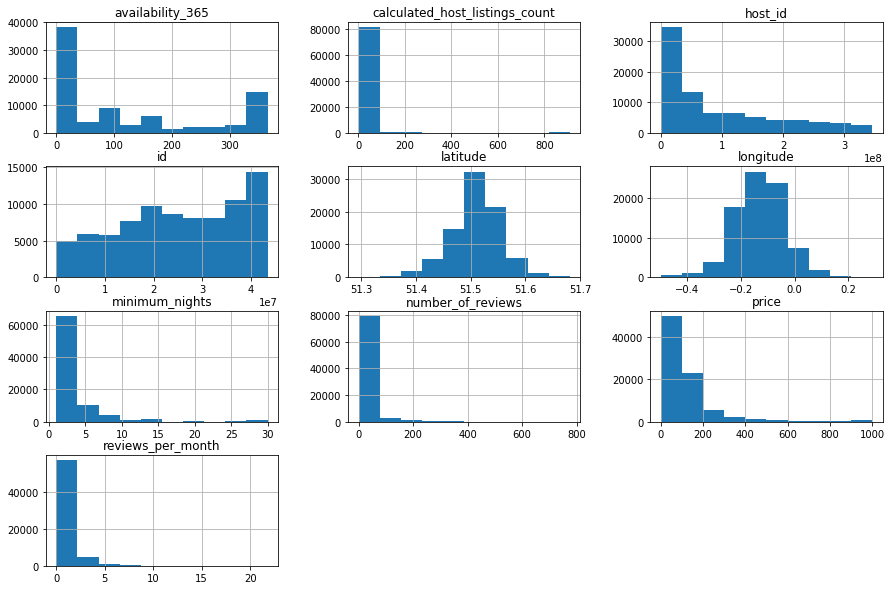

In [21]:
# remove the outliers in these 2 variables inside the dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotting
df_clean.hist(bins=10, figsize=(15,10));

## Correlation

**In this section we are going to analyse the correlations between the features.**

Basically, if two features have a positive correlation, it means that if one of them varys in one direction, the other tend to vary in the same direction too.

On the other side, if two variables have a negative correlation, it means that if one varys in one direction, the other tend to go to the other direction.

Although, it is important to keep in mind that the highest correlation is 1 and the smallest is -1. Values near 0 mean that there is a week correlation, meaning that the two variables dont have the characteristcs explicited above.

In [22]:
# creating correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

corr.style.background_gradient(cmap = "coolwarm")

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.027816,-0.096436,-0.064860,0.313512,0.128898
minimum_nights,0.027816,1.000000,-0.087263,-0.144213,0.020684,0.018682
number_of_reviews,-0.096436,-0.087263,1.000000,0.721190,-0.058698,0.113229
reviews_per_month,-0.064860,-0.144213,0.721190,1.000000,-0.052421,0.132015
calculated_host_listings_count,0.313512,0.020684,-0.058698,-0.052421,1.000000,0.003462
availability_365,0.128898,0.018682,0.113229,0.132015,0.003462,1.000000


### Correlation insights
1. Examining the matrix we can see obvious correlations like the reviews_per_month and number_of_reviews. These variables represent nearly the same category but in different timespaces.
2. Another obvious correlation is the one within the reviews_per_month and the minimun_nights. If there is a requirement with more nights than the average, it can be concluded that the place will have less reviews than the mean, since it has a lower rotation.
3. The price variable is slightly correlated with the calculated_host_listings_count, which may suggest that the hosts that held more places tend to deal with an average price above the normal mean.

## Most used property in airbnb London
* As we can see below, 55% of the announces in Airbnb London are Entire home/Apt, followed by 42% of Private room.

In [23]:
df_clean.room_type.value_counts()

Entire home/apt    46841
Private room       35623
Hotel room           742
Shared room          671
Name: room_type, dtype: int64

In [24]:
np.round(df_clean.room_type.value_counts() / df_clean.shape[0] * 100,2)

Entire home/apt    55.84
Private room       42.47
Hotel room          0.88
Shared room         0.80
Name: room_type, dtype: float64

## Most expensive neighbourhood
* In this section we are going to analyse the most expensive neighbourhoods to stay with airbnb in London.

In [25]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kensington and Chelsea    190.503761
Westminster               189.641744
City of London            173.926471
Camden                    147.830085
Hammersmith and Fulham    134.604177
Richmond upon Thames      124.228571
Wandsworth                120.171135
Islington                 114.373265
Southwark                 113.559389
Merton                    106.206767
Name: price, dtype: float64

According to the [investopedia](https://www.investopedia.com/articles/personal-finance/100115/most-expensive-neighborhoods-london.asp), the top expensive neighbourhoods in London are:

<table border="1">
    <tr><td>1.</td><td>Knighstbridge</td></tr>
    <tr><td>2.</td><td>West Brompton</td></tr>
    <tr><td>3.</td><td>Kensington and Chelsea</td></tr>
    <tr><td>4.</td><td>Westminster</td></tr>
</table>	

Although, in Airbnb database, these first two neighbourhoods are not available or at least dont appear in our top 10. Lets check:

In [26]:
df_clean.neighbourhood.unique()

array(['Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Wandsworth', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Hackney', 'Southwark',
       'Croydon', 'Tower Hamlets', 'Waltham Forest', 'Brent', 'Camden',
       'Newham', 'Lambeth', 'Redbridge', 'Merton', 'Lewisham', 'Bromley',
       'Havering', 'Greenwich', 'Ealing', 'Enfield', 'City of London',
       'Barking and Dagenham', 'Hillingdon', 'Harrow',
       'Kingston upon Thames', 'Bexley', 'Sutton'], dtype=object)

Indeed, they dont seem to appear in the dataset.

## Mapping the most expensive and the cheapest places

In [27]:
df_expensive = df_clean.loc[df_clean['price'] > 900]
df_expensive.shape

(581, 15)

In [28]:
df_expensive.room_type.value_counts()

Entire home/apt    281
Private room       198
Hotel room          57
Shared room         45
Name: room_type, dtype: int64

In [29]:
df_expensive_entire = df_expensive.loc[df_expensive.room_type == 'Entire home/apt']
df_expensive_private = df_expensive.loc[df_expensive.room_type == 'Private room']
df_expensive_hotel = df_expensive.loc[df_expensive.room_type == 'Hotel room']
df_expensive_share = df_expensive.loc[df_expensive.room_type == 'Shared room']

In [30]:
# plotar os imóveis pela latitude-longitude
plt.plot(df_expensive_entire['longitude'],df_expensive_entire['latitude'], '^', color = 'purple')
plt.plot(df_expensive_private['longitude'],df_expensive_private['latitude'], 'v', color = 'orange')
plt.plot(df_expensive_hotel['longitude'],df_expensive_hotel['latitude'], 'o', color = 'red')
plt.plot(df_expensive_share['longitude'],df_expensive_share['latitude'], 'x', color = 'blue')

mplleaflet.show()

* Here the purple signs represent the entire Home/apt category in the most expensive places
* the orange represents Private room
* red represents hotels
* blue represents shared rooms?
![imgs/expensive.png](imgs/expensive.png)

* We can see that there is a bigger concentration of the most expensive places near the parks, such as green park and hyde park, and the zone 1 itself.

Lets plot the cheapest ones, in order to compare with the location of the most expensive ones.

In [31]:
df_cheap = df_clean.loc[df_clean['price'] < 20]
df_cheap.shape

(817, 15)

In [32]:
# plotar os imóveis pela latitude-longitude
plt.plot(df_cheap['longitude'],df_cheap['latitude'], '^', color = 'purple')
mplleaflet.show()

![imgs/cheap.png](imgs/cheap.png)

* As so, we can see that the cheapest places are more spread out throughout all the zones and only a few of them are in the center and near the parks.

## Comparing room type

In [33]:
df_cheap['room_type'].value_counts()

Private room       616
Shared room        135
Entire home/apt     54
Hotel room          12
Name: room_type, dtype: int64

In [34]:
df_expensive['room_type'].value_counts()

Entire home/apt    281
Private room       198
Hotel room          57
Shared room         45
Name: room_type, dtype: int64

Although, in the last section some of the cheapest places appeared in zone 1, we must take into consideration the distribution of room types. The expensive ones are mostly **Entire home/apt**, the cheapest ones are **Private room**.

## Heatmap of all places

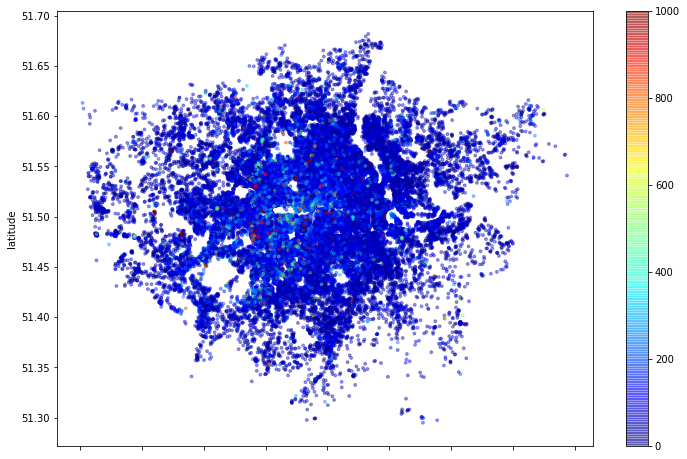

In [35]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Final considerations

In this notebook we made a superficial analysis of Londons Airbnb dataset. Our intention was to understand the dynamics of the enterprise in one of the biggest cities in the world.

Throughout our examination, we got some insights in relation to the concentration of properties in the hands of few and got a simple comprehension on where the properties tend to be more expensive.

Beyond that, we observed the differences in room type between the expensive and cheap location along with how each of min and max price properties are distributes through London.

In resume, you should bear in mind that this dataset is a resumed version, with less columns and easier to manipulate. You can find a complete version in the [inside airbnb site](!http://insideairbnb.com/get-the-data.html).

<div class="alert alert-block alert-danger"><b>Warning:</b> Remember to visit me on github and linkedin :D</div>

<code style="background:yellow;color:black">Any doubs or suggestions let me know. Thanks for your time.</code>

<nav>
    <a href="https://www.linkedin.com/in/itamarrocha/">Linkedin</a> |
    <a href="https://github.com/ItamarRocha/">Github</a>
</nav>